In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import metrics
import seaborn as sns
import scipy.stats as st
from matplotlib import colors

In [2]:
if not os.path.exists('output_figures'):
    os.mkdir('output_figures')

In [3]:
data = pd.read_excel('Dataset_muSORS.xlsx', sheet_name='Fig.3c-f, Extended Data Fig.6-8')
data = data.to_numpy()

In [4]:
def num2str_array(array):
    new_arr = []
    for x in array:
        try:
            new_arr.append(float(x))
        except:
            new_arr.append(np.nan)
    return np.array(new_arr)

In [5]:
subject = data[2:, 0]
sampling_point = data[2:, 1]
VPG = data[2:, 2]
y_true_1 = num2str_array(data[2:, 3])
y_pred_1 = num2str_array(data[2:, 4])
y_true_2 = num2str_array(data[2:, 5])
y_pred_2 = num2str_array(data[2:, 6])
subject_number = np.array([int(x[1:]) if not pd.isnull(x) else np.nan for x in subject])
subject_type = np.array([x[0] if not pd.isnull(x) else np.nan for x in subject])

In [6]:
subject_d = subject_number[subject_type == 'D']
sampling_point_d = sampling_point[subject_type == 'D'].astype('int')
VPG_d = VPG[subject_type == 'D']
y_true_1_d = y_true_1[subject_type == 'D']
y_true_2_d = y_true_2[subject_type == 'D']
y_pred_1_d = y_pred_1[subject_type == 'D']
y_pred_2_d = y_pred_2[subject_type == 'D']

In [7]:
subject_n = subject_number[subject_type == 'N']
sampling_point_n = sampling_point[subject_type == 'N'].astype('int')
VPG_n = VPG[subject_type == 'N']
y_true_1_n = y_true_1[subject_type == 'N']
y_true_2_n = y_true_2[subject_type == 'N']
y_pred_1_n = y_pred_1[subject_type == 'N']
y_pred_2_n = y_pred_2[subject_type == 'N']

In [8]:
mard_d_subject = np.zeros(200)
for i in range(200):
    y_true_i = np.concatenate((y_true_1_d[subject_d == i+1], y_true_2_d[subject_d == i+1]))
    y_pred_i = np.concatenate((y_pred_1_d[subject_d == i+1], y_pred_2_d[subject_d == i+1]))
    valid_idx = (np.isnan(y_true_i + y_pred_i) == 0)
    mard_d_subject[i] = metrics.mard(y_true_i[valid_idx], y_pred_i[valid_idx])

D:\blood_glucose\NM校稿\NM校稿_250106\code\metrics.py:21: RuntimeWarning: invalid value encountered in double_scalars
  MARD = np.sum(np.abs(y_pred-y_true)/y_true)/len(y_true)


In [9]:
mard_n_subject = np.zeros(30)
for i in range(30):
    y_true_i = np.concatenate((y_true_1_n[subject_n == i+1], y_true_2_n[subject_n == i+1]))
    y_pred_i = np.concatenate((y_pred_1_n[subject_n == i+1], y_pred_2_n[subject_n == i+1]))
    valid_idx = (np.isnan(y_true_i + y_pred_i) == 0)
    mard_n_subject[i] = metrics.mard(y_true_i[valid_idx], y_pred_i[valid_idx])

In [10]:
time_d = np.array([15*i for i in range(11)] + [180])
time_n = np.array([30*i for i in range(9)])

In [11]:
color_list = sns.color_palette('deep')
color_dark_blue = '#1e2c5b'
color_light_yellow = '#ffe200'

<Figure size 640x480 with 0 Axes>

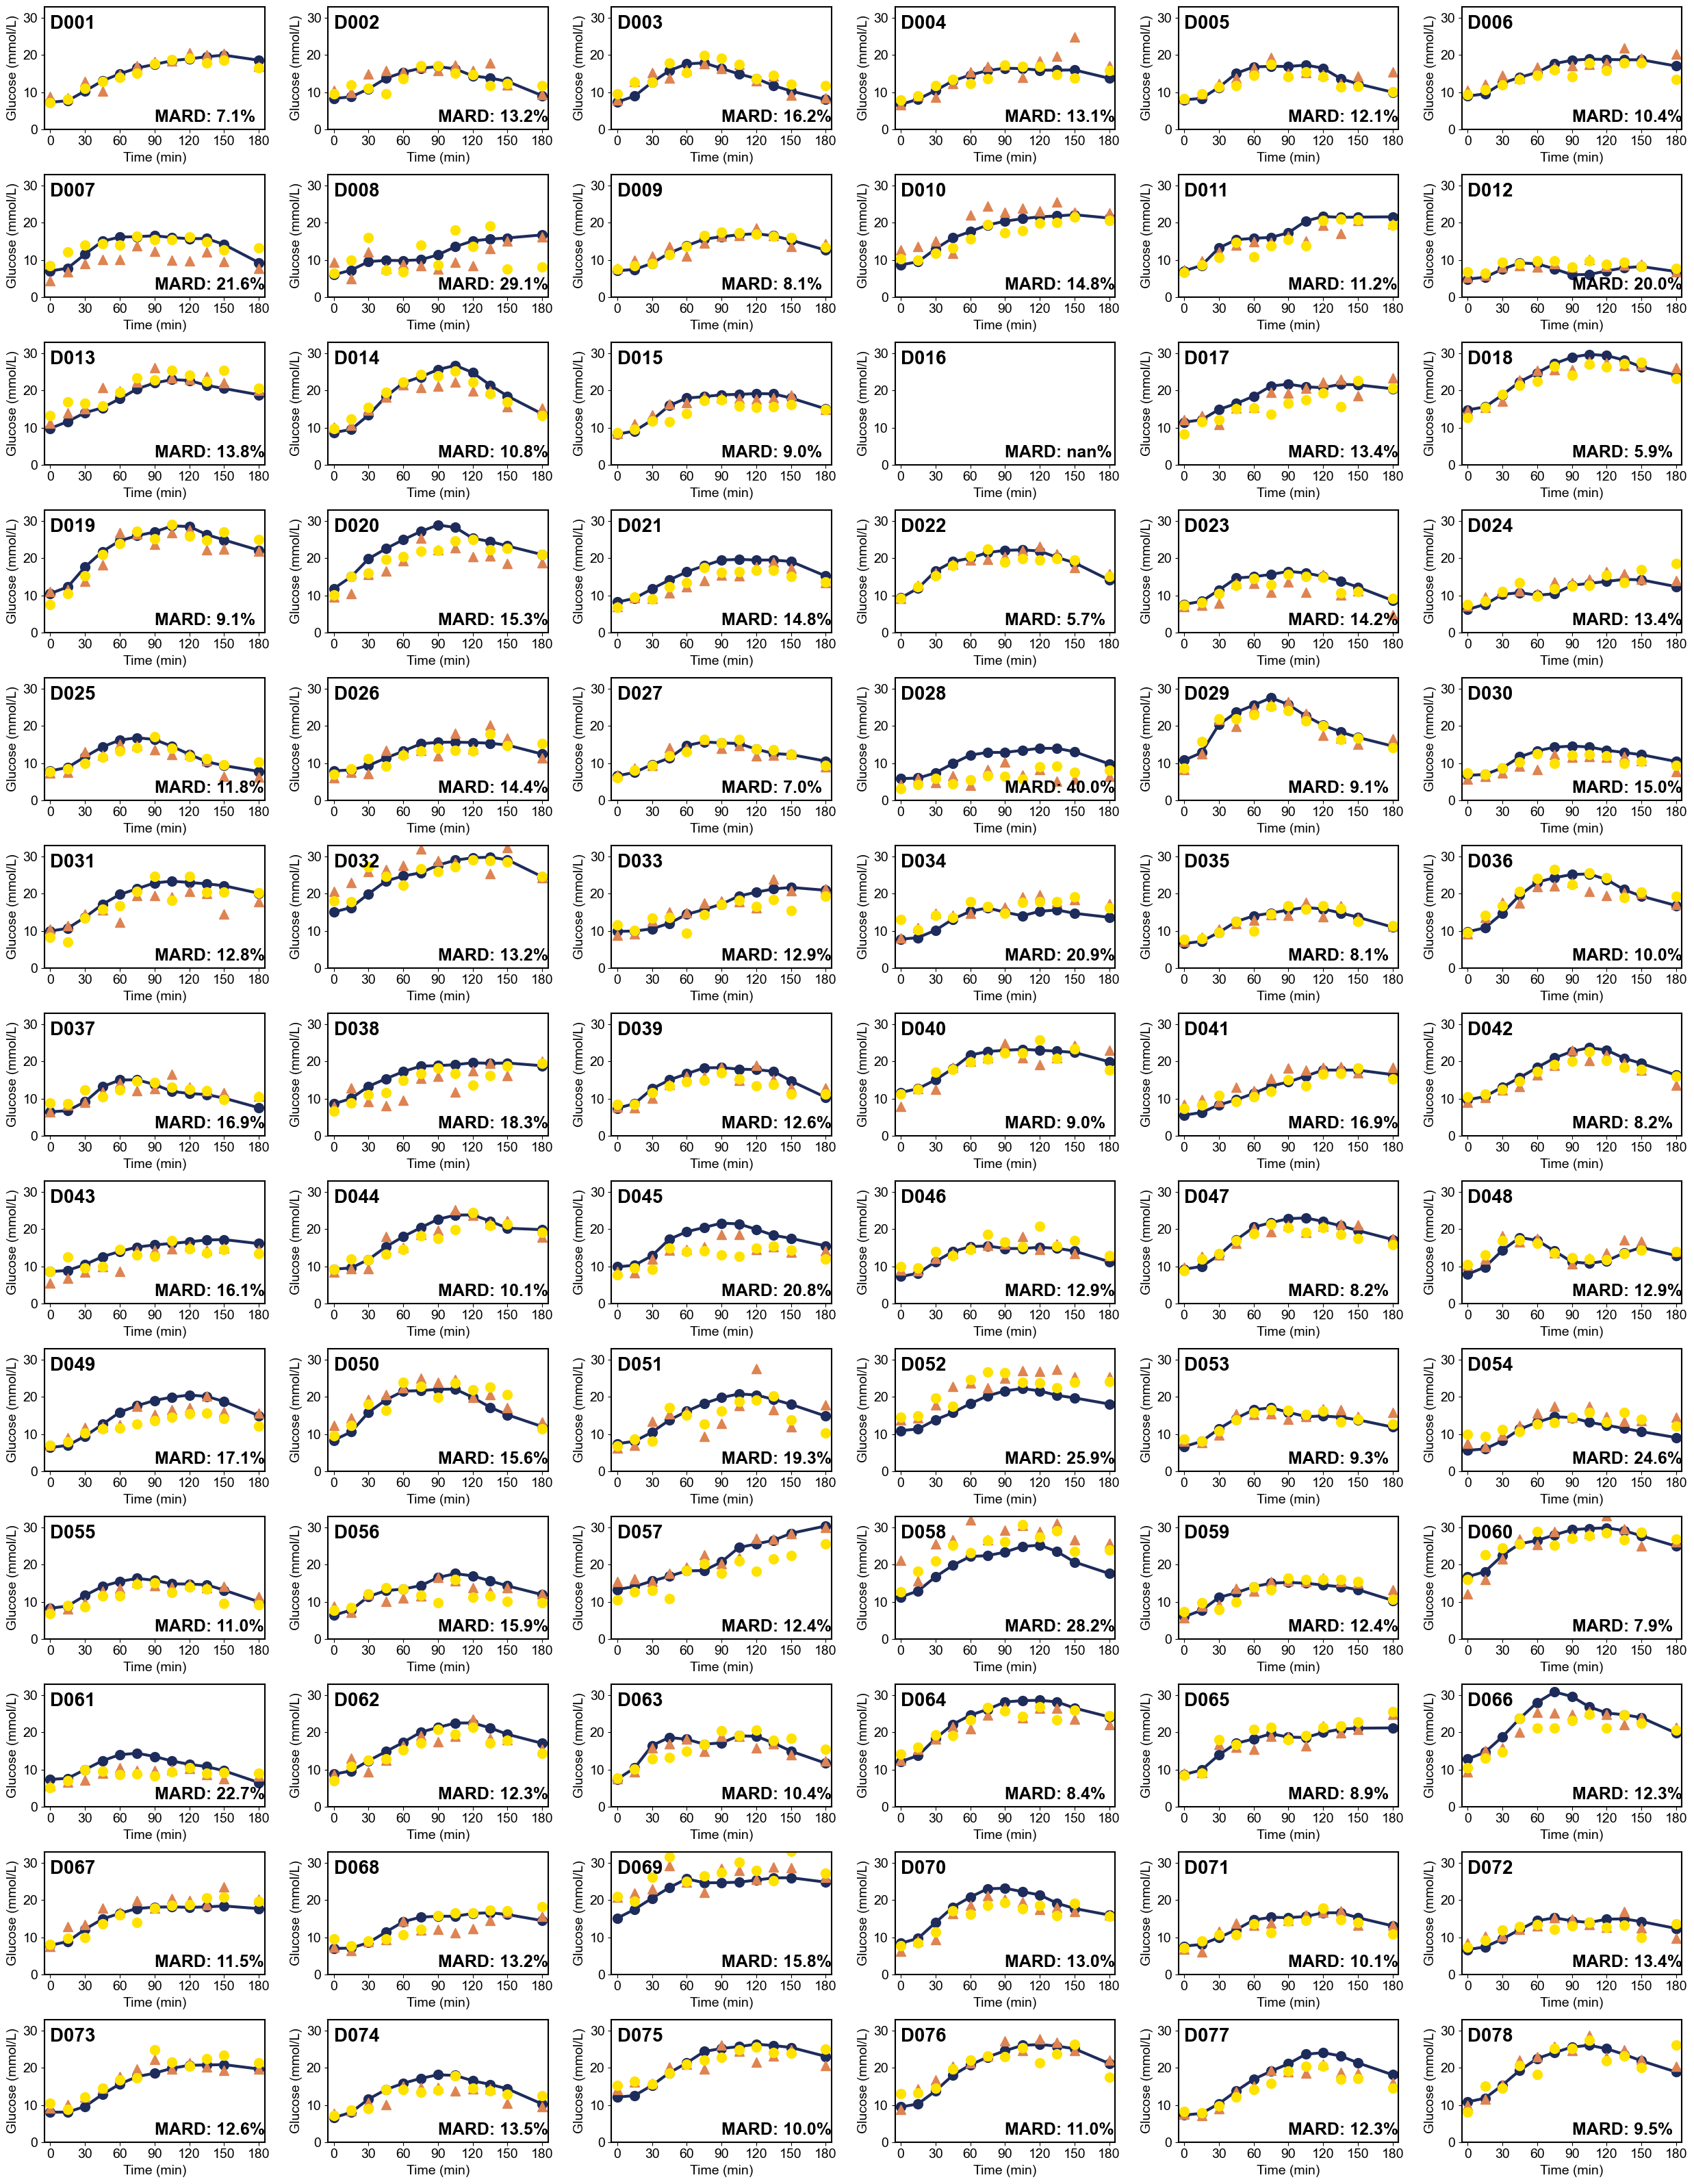

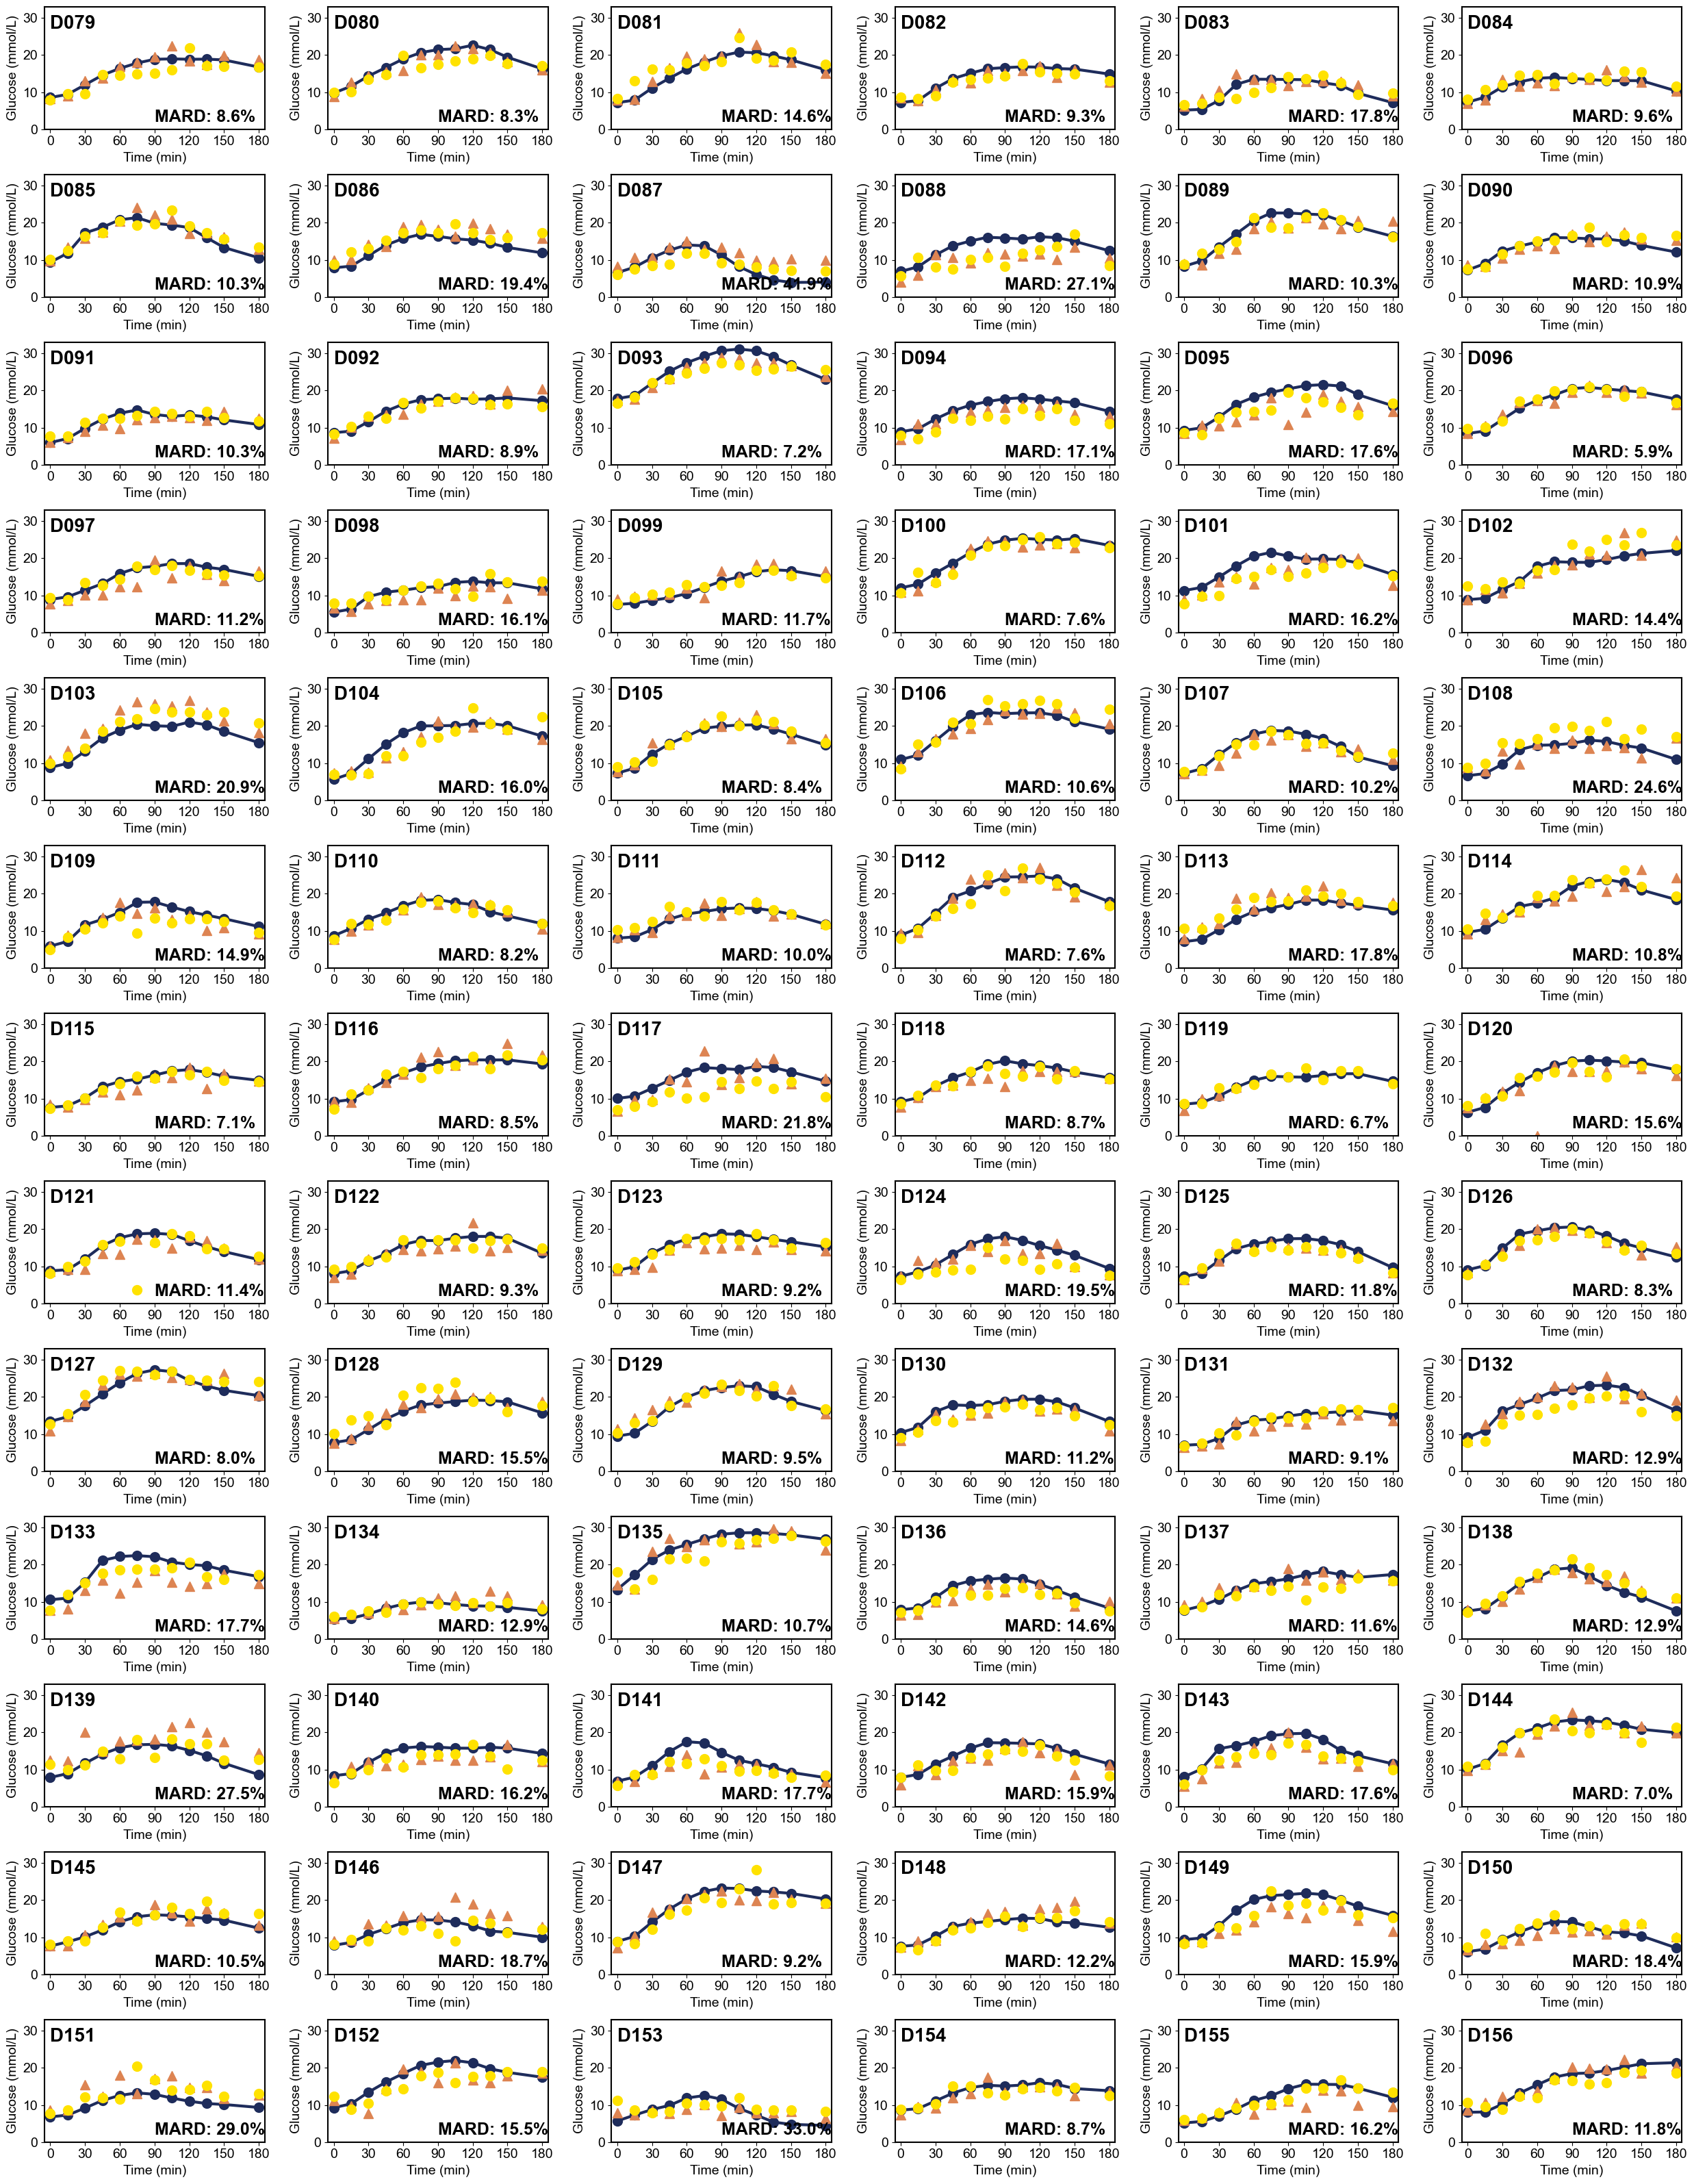

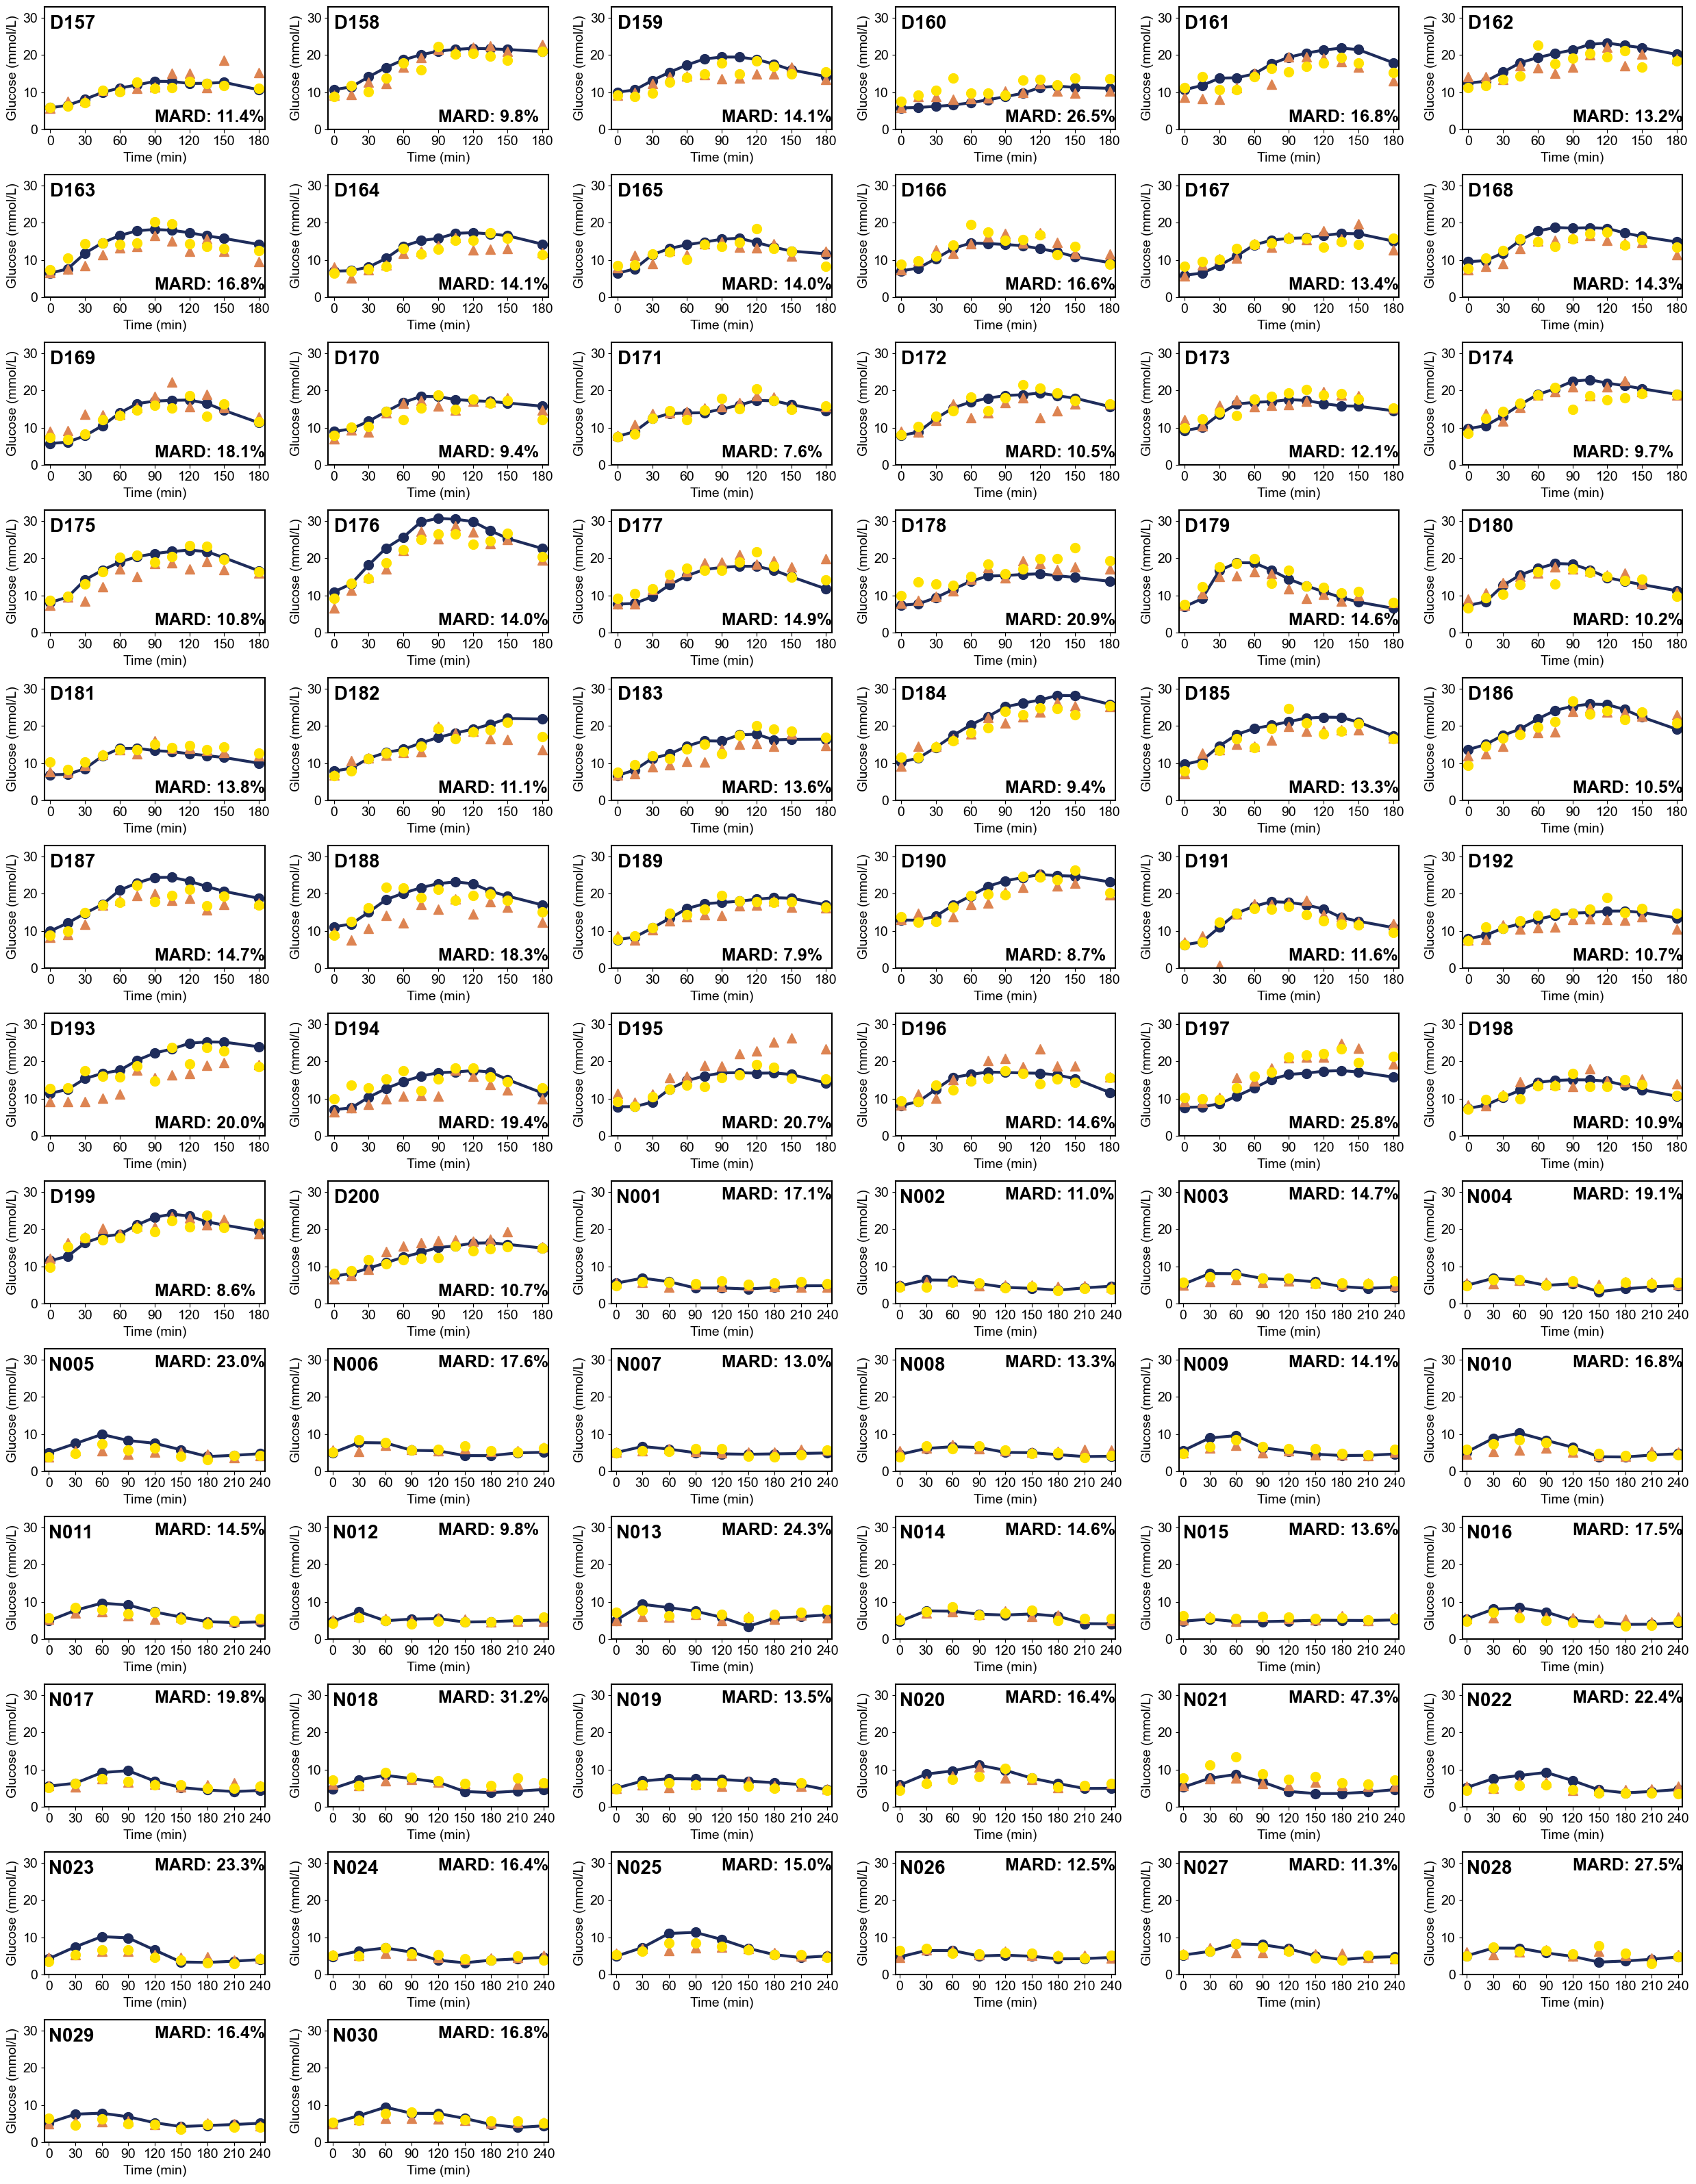

In [12]:
j = 1
plt.rcParams['font.sans-serif'] = ['Arial']
plt.subplots_adjust(hspace=0.3)
flag = 1
while flag:
    plt.figure(figsize=(25,32))
    for i in range(78):
        subject_1 = i+1 + 78*(j-1)
        if subject_1 <= 200:
            mard = mard_d_subject[subject_1-1]
            plt.subplot(13,6,i+1)
            if subject_1 == 16:
                time = time_d
                y_true = np.nan*np.ones(len(time_d))
                y_pred_left = np.nan*np.ones(len(time_d))
                y_pred_right = np.nan*np.ones(len(time_d))
            else:
                time = time_d[sampling_point_d[subject_d == subject_1]-1]
                y_true = (y_true_1_d[subject_d == subject_1] + y_true_2_d[subject_d == subject_1])/2
                if np.sum(np.isnan(y_true)) > 0:
                    for k in range(len(y_true)):
                        if np.isnan(y_true[k]) and np.isnan(y_true_1_d[subject_d == subject_1][k]):
                            y_true[k] = y_true_2_d[subject_d == subject_1][k]
                        elif np.isnan(y_true[k]) and np.isnan(y_true_2_d[subject_d == subject_1][k]):
                            y_true[k] = y_true_1_d[subject_d == subject_1][k]
                y_pred_left = y_pred_1_d[subject_d == subject_1]
                y_pred_right = y_pred_2_d[subject_d == subject_1]
            plt.plot(time, y_true, '-o', c=color_dark_blue, linewidth=3, markersize=10)
            plt.plot(time, y_pred_left, '^', c=color_list[1], linewidth=3, markersize=10)
            plt.plot(time, y_pred_right, 'o', c=color_light_yellow, linewidth=3, markersize=10)
            plt.xlim([-5, 185])
            plt.ylim([0, 33])
            plt.xticks(np.hstack((time_d[::2], time_d[-1])), fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlabel('Time (min)', fontsize=14)
            plt.ylabel('Glucose (mmol/L)', fontsize=14)
            plt.text(0, 27, 'D'+"%03d" % subject_1, fontsize=20, weight='bold',fontdict={'family':'Arial'})
            plt.text(90, 2, f'MARD:{mard: .1%}', fontsize=18, weight='bold',fontdict={'family':'Arial'})
            ax=plt.gca()
            ax.spines['top'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['right'].set_linewidth(1.5)
        elif subject_1 <= 230:
            subject_2 = subject_1-200
            mard = mard_n_subject[subject_2-1]
            plt.subplot(13,6,i+1)
            time = time_n[sampling_point_n[subject_n == subject_2]-1]
            y_true = (y_true_1_n[subject_n == subject_2] + y_true_2_n[subject_n == subject_2])/2
            y_pred_left = y_pred_1_n[subject_n == subject_2]
            y_pred_right = y_pred_2_n[subject_n == subject_2]
            plt.plot(time, y_true, '-o', c=color_dark_blue, linewidth=3, markersize=10)
            plt.plot(time, y_pred_left, '^', c=color_list[1], linewidth=3, markersize=10)
            plt.plot(time, y_pred_right, 'o', c=color_light_yellow, linewidth=3, markersize=10)
            plt.xlim([-5, 245])
            plt.ylim([0, 33])
            plt.xticks(time_n, fontsize=14)
            plt.yticks(fontsize=14)
            plt.xlabel('Time (min)', fontsize=14)
            plt.ylabel('Glucose (mmol/L)', fontsize=14)
            plt.text(0, 27, 'N'+"%03d" % subject_2, fontsize=20, weight='bold',fontdict={'family':'Arial'})
            plt.text(120, 28, f'MARD:{mard: .1%}', fontsize=18, weight='bold',fontdict={'family':'Arial'})
            ax=plt.gca()
            ax.spines['top'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['right'].set_linewidth(1.5)
        else:
            flag = 0
    plt.tight_layout()
    plt.savefig('output_figures/all_predictions-cross-'+str(j)+'.pdf')
    j = j + 1